In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [82]:
%matplotlib inline

In [192]:
path = "C:\\Users\\rafae\\OneDrive\\Documentos\\GitHub\\lab-eda-bivariate\\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(path)

In [193]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [84]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


### Part 1: Analyzing Best-Seller Trends Across Product Categories
##### Objective: Understand the relationship between product categories and their best-seller status.

#### Part 1.1, Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.der.

In [85]:
crosstab_table = pd.crosstab(df['category'], df['isBestSeller'])

In [86]:
crosstab_table_intact = pd.crosstab(df['category'], df['isBestSeller'])

In [87]:
crosstab_table_intact

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [88]:
crosstab_table

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [89]:
crosstab_table = crosstab_table.sort_values(by=True, ascending=False)

In [90]:
crosstab_table_head = crosstab_table.sort_values(by=True, ascending=False).head(3)

In [91]:
crosstab_table_head

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341


In [92]:
crosstab_table

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [93]:
crosstab_table['Total'] = crosstab_table.sum(axis=1)

In [94]:
crosstab_table

isBestSeller,False,True,Total
category,,,
Grocery,9008,556,9564
Health & Personal Care,9017,552,9569
Baby,14709,341,15050
Sports & Outdoors,835935,330,836265
Power & Hand Tools,8353,306,8659
...,...,...,...
Downhill Ski Boots,1284,0,1284
Digital Frames,774,0,774
Motorbike Chassis,107,0,107


In [95]:
crosstab_table['% Best Seller'] = round((crosstab_table[True] / crosstab_table['Total']) * 100,1)

In [96]:
crosstab_table

isBestSeller,False,True,Total,% Best Seller
category,,,,
Grocery,9008,556,9564,5.8
Health & Personal Care,9017,552,9569,5.8
Baby,14709,341,15050,2.3
Sports & Outdoors,835935,330,836265,0.0
Power & Hand Tools,8353,306,8659,3.5
...,...,...,...,...
Downhill Ski Boots,1284,0,1284,0.0
Digital Frames,774,0,774,0.0
Motorbike Chassis,107,0,107,0.0


In [97]:
crosstab_table.sort_values(by='% Best Seller', ascending=False).head(10)

isBestSeller,False,True,Total,% Best Seller
category,,,,
Grocery,9008,556,9564,5.8
Health & Personal Care,9017,552,9569,5.8
Smart Home Security & Lighting,98,6,104,5.8
Mobile Phone Accessories,248,11,259,4.2
Power & Hand Tools,8353,306,8659,3.5
"Billiard, Snooker & Pool",241,8,249,3.2
Pet Supplies,9152,285,9437,3.0
Mirrors,243,7,250,2.8
Wind Instruments,243,7,250,2.8


In [98]:
crosstab_top3 = crosstab_table.sort_values(by='% Best Seller', ascending=False).head(3)

In [99]:
crosstab_top3

isBestSeller,False,True,Total,% Best Seller
category,,,,
Grocery,9008,556,9564,5.8
Health & Personal Care,9017,552,9569,5.8
Smart Home Security & Lighting,98,6,104,5.8


#### Are there categories where being a best-seller is more prevalent?

##### Answer: The categories with at least 5% best-seller are 'Grocery', 'Health & Personal Care' and 'Smart Home Security & Lightning'. All of them have a share of 5.8% respectively.

#### Part 1.2, Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

Compute Cramér's V to understand the strength of association between best-seller status and category.

In [100]:
# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

NameError: name 'crosstab_result' is not defined

In [ ]:
chi2_statistic, chi2_p_value, _1, _2 = chi2_contingency(crosstab_table_intact)

In [ ]:
print(f"Chi Square Statistic: {chi2_statistic}")
print(f"Chi P Value: {chi2_p_value}")

#### 1.2, First Answer

Due to the result of p-value equal to 0, there is a perfect correlation and therefore NO independence of the best seller distribution x category, suggesting that both are correlated. The strength of that correlation is to be measured in the next step, using Cramers V value.

In [ ]:
# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_table_intact, method="cramer")

In [ ]:
association(crosstab_top3, method="cramer")

#### 1.2, Second Answer

With a Cramer's V value of .12, the strength of association is low, despite being clearly present.

#### Part 1.3, Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

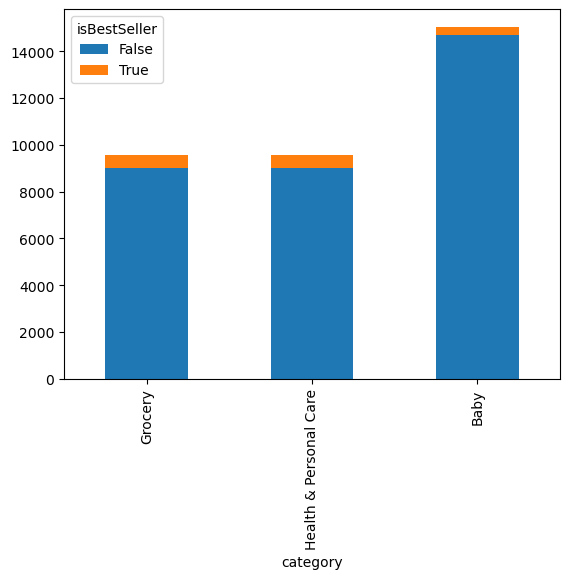

In [102]:
crosstab_table_head.plot(kind="bar", stacked=True)

<Axes: xlabel='category'>

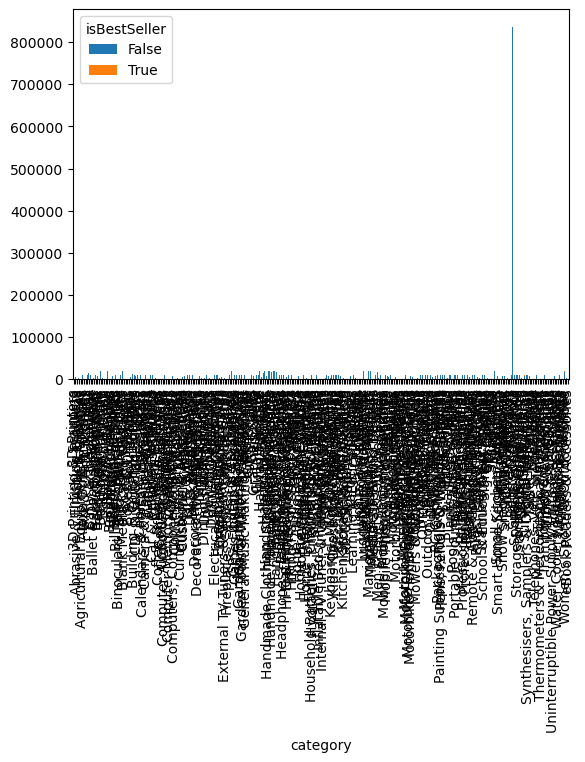

In [104]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_table_intact.plot(kind="bar", stacked=True)

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands
#### Objective: Investigate how different product categories influence product prices.

##### Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

#### Step 2.0, Remove outliers

In [ ]:
# Example usage:
data_series = df['ColumnName']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)

In [194]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [195]:
data_tukey = df["price"]
outliers = tukeys_test_outliers(data_tukey)
print(outliers)

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


##### Step below takes the outliers defined above (through the function) and then checks if values in the column price are present in the outliers. If yes, they are removed

In [196]:
filtered_df = df[~df['price'].isin(outliers)]

In [197]:
filtered_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


#### Step 2.1, Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories.

Filter out the top 20 categories based on count for better visualization.

Which product category tends to have the highest median price? Don't filter here by top categories.

In [198]:
filtered_df["category"].value_counts().head(20).index

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor',
       'Luggage and travel gear', 'Women', 'Fragrances',
       'Handmade Kitchen & Dining', 'Handmade Artwork',
       'Handmade Home & Kitchen Products', 'Handmade Jewellery', 'Men',
       'Baby'],
      dtype='object', name='category')

In [199]:
alpha_filter = filtered_df["category"].value_counts().head(20).index

In [200]:
alpha_filter

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor',
       'Luggage and travel gear', 'Women', 'Fragrances',
       'Handmade Kitchen & Dining', 'Handmade Artwork',
       'Handmade Home & Kitchen Products', 'Handmade Jewellery', 'Men',
       'Baby'],
      dtype='object', name='category')

In [201]:
filtered_df = filtered_df[filtered_df['category'].isin(alpha_filter)]

In [202]:
filtered_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


C:\Users\rafae\AppData\Local\Temp\ipykernel_34332\712099859.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='category', y='price', palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

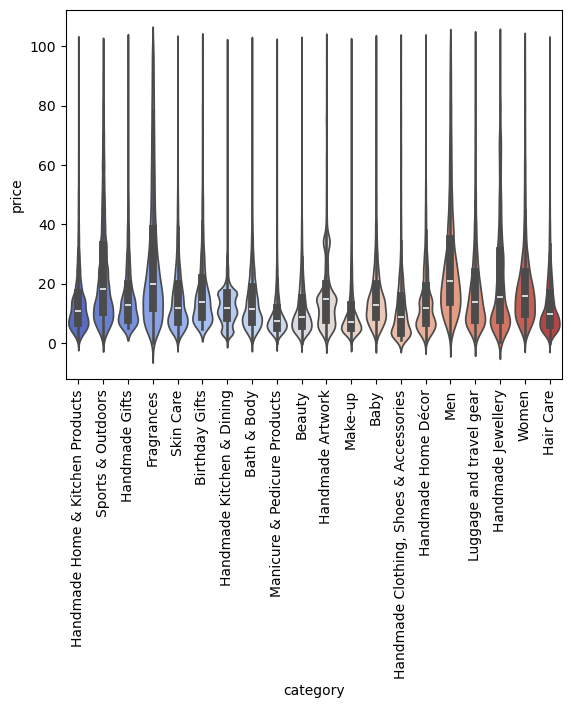

In [204]:
sns.violinplot(data=filtered_df, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=90)